In [125]:
import numpy as np
import matplotlib.pyplot as plt

In [126]:
N1 = N2 = 1000

In [127]:
x1 = np.random.normal(1,3,N1)
x2 = np.random.uniform(0.5,1.5,N2)

In [128]:
# Calcola ECDF
n = 1000
y = np.arange(1, n + 1) / n  # y[i] = i / n

In [129]:
def compute_ecdf(data):
    """Restituisce (x_sorted, ecdf_y)"""
    data = np.sort(data)
    n = len(data)
    ecdf_y = np.arange(1, n + 1) / n
    return data, ecdf_y

In [130]:
x1_sorted, ecdf1 = compute_ecdf(x1)
x2_sorted, ecdf2 = compute_ecdf(x2)
D = np.max(np.abs(ecdf1-ecdf2))

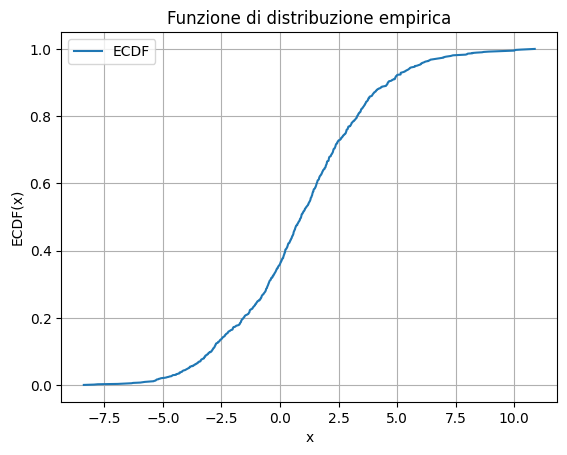

In [131]:
plt.plot(x1_sorted, ecdf1,label="ECDF")
plt.xlabel("x")
plt.ylabel("ECDF(x)")
plt.title("Funzione di distribuzione empirica")
plt.grid(True)
plt.legend()
plt.show()


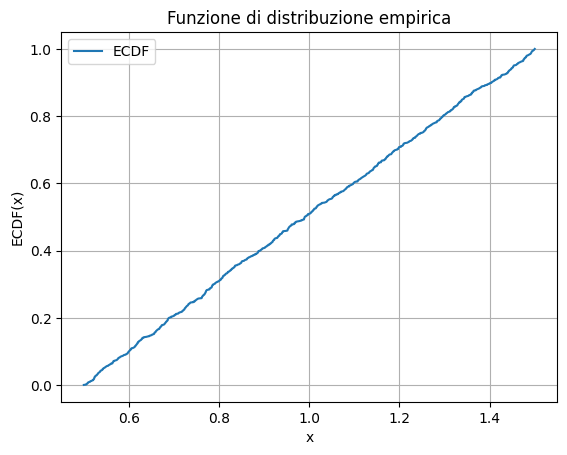

In [132]:
plt.plot(x2_sorted, ecdf2,label="ECDF")
plt.xlabel("x")
plt.ylabel("ECDF(x)")
plt.title("Funzione di distribuzione empirica")
plt.grid(True)
plt.legend()
plt.show()


In [133]:
def ecdf_pointwise(data, x_point):
    return np.searchsorted(np.sort(data), x_point, side='right') / len(data)


In [134]:
# 1. Unione dei dati per dominio comune
all_points = np.sort(np.concatenate([x1, x2]))

# 2. Valuta ECDF1 e ECDF2 sugli stessi punti
ecdf1 = np.array([ecdf_pointwise(x1, x) for x in all_points])
ecdf2 = np.array([ecdf_pointwise(x2, x) for x in all_points])

# 3. Calcola la statistica KS
D = np.max(np.abs(ecdf1 - ecdf2))
print(f"KS statistic D = {D:.4f}")


KS statistic D = 0.4390


In [135]:
ne = (1/N1 + 1/N2)**-1

In [136]:
from scipy.stats import ks_1samp, norm
from scipy import stats

In [137]:
stats.kstest(x1,stats.norm.cdf)

KstestResult(statistic=np.float64(0.3525961268228597), pvalue=np.float64(1.0812357938401241e-111), statistic_location=np.float64(1.273592853274088), statistic_sign=np.int8(-1))

In [141]:
from scipy.stats import anderson

In [150]:
result = anderson(x2, dist='norm')

In [151]:
result.statistic

np.float64(11.491274562396029)

In [152]:
np.digitize(result.statistic,result.critical_values)

np.int64(5)

In [153]:
result.significance_level[3]

np.float64(2.5)